# Analyzing
To get a better idea of the structure of the csv files, some methods for analyzing and visualizing can be found here.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import os
import warnings
# Root CSV files directory
dirname = "./data/absolute/2D/"

### Load

In [3]:
listfile = os.listdir(dirname)
listfile= sorted(listfile, key=str.casefold) 
data = []
for wordname in listfile:
    if wordname == ".DS_Store":
        continue
    for csv in os.listdir(dirname + wordname):
        filepath = os.path.join(dirname, wordname, csv)
        content = pd.read_csv(filepath, sep=';')
        data.append((wordname, content))

## Frame count distribution per word

In [4]:
row_lengths = {}
for (word, content) in data:
    row_lengths[word] = []
for (word, content) in data:
    row_lengths[word].append(content.shape[0])
print(row_lengths)

{'Computer': [40, 36, 38, 36, 34, 48, 59, 21, 39, 61, 37, 69, 48, 36, 34, 85, 49, 31, 67, 49, 17, 41, 40, 66, 49, 57, 69, 45, 56, 48, 47, 35, 74, 20, 44, 49, 43, 69, 73, 35, 39, 28, 27, 46, 38, 39, 33, 33, 56, 34, 68, 49, 55, 66, 49, 39, 30, 33], 'Deutschland': [64, 57, 38, 48, 45, 33, 50, 67, 44, 45, 33, 16, 24, 39, 41, 69, 47, 45, 38, 37, 48, 37, 34, 22, 57, 50, 41, 37, 48, 14, 32, 80, 59, 45, 71, 53, 40, 36, 43, 28, 33, 57, 38, 39, 19, 55, 60, 51, 67, 34, 49, 40, 26, 48, 41, 59, 57, 62, 19, 38, 47, 26, 35, 58, 42, 16, 57], 'du': [60, 46, 34, 35, 55, 65, 43, 27, 53, 42, 59, 29, 41, 37, 30, 48, 35, 59, 52, 43, 41, 42, 35, 45, 79, 65, 33, 39, 45, 43, 66, 55, 45, 47, 36, 41, 44, 83, 42, 44, 44, 43, 39, 47, 37, 50, 41, 67, 39, 34, 76, 43, 38, 35, 47, 39, 40, 49, 50, 32, 41, 55, 45, 34, 30, 42, 48, 43, 41, 35], 'Haben': [27, 50, 38, 36, 40, 45, 44, 34, 39, 32, 54, 37, 33, 35, 27, 35, 43, 35, 38, 39, 36, 56, 32, 41, 40, 53, 40, 43, 48, 41, 33, 35, 42, 28, 28, 59, 31, 35, 56, 45, 35, 32, 40

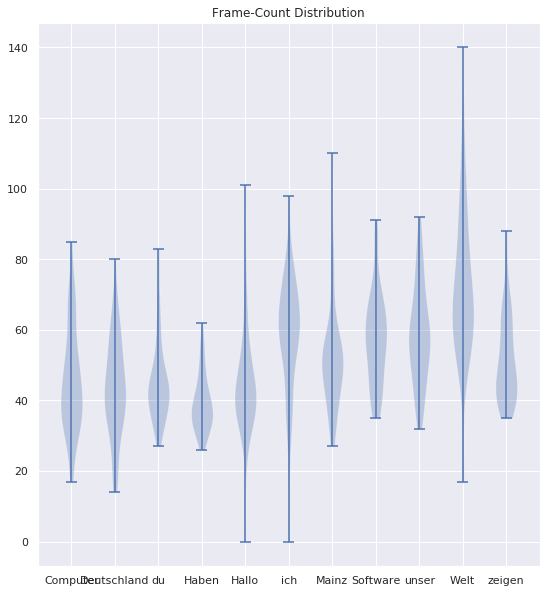

In [5]:
all_data = row_lengths.values()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,10))

# plot violin plot
axs.violinplot(all_data)
axs.set_title('Frame-Count Distribution')
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=row_lengths.keys())
plt.show()

In [6]:
sign = np.array(data[20][1])
np.nan_to_num(sign, copy=False)
rows = []
for row in sign:
    x, y = row[::2], row[1::2]
    rows.append((x,y))


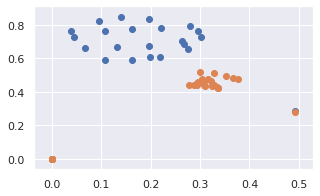

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = ax.scatter(rows[1][0], rows[1][1])
def animate(i):
    ax.scatter(rows[i][0], rows[i][1])
anim = FuncAnimation(
fig, animate, interval=12, frames=len(rows)-1)